# Mushroom Classification Project
This notebook demonstrates a complete machine learning workflow to classify mushrooms as edible or poisonous. Steps include EDA, data cleaning, imbalance and outlier handling, feature engineering, train/test split, dimensionality reduction, model training, and evaluation.

In [65]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
df = pd.read_csv(r'data/Mushroom-Dataset(Data).csv')
df.head()

,Type,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
# Step 2: Data Overview and Info
df.info()
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Type                      8124 non-null   object
 1    cap-shape                8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [67]:
# Step 3: Check for Missing Values
df.isnull().sum()

Type                        0
 cap-shape                  0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

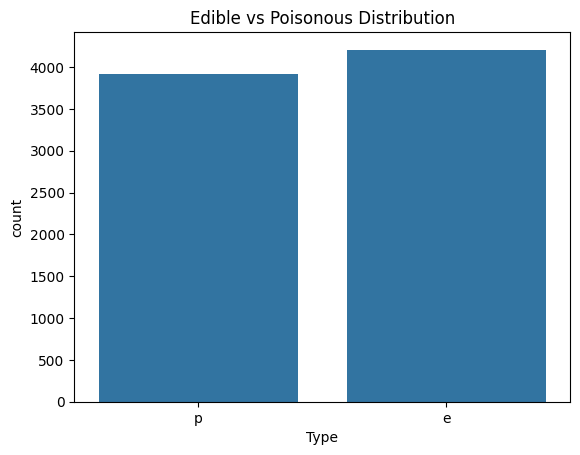

In [68]:
# Step 4: Class Distribution Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Type', data=df)
plt.title('Edible vs Poisonous Distribution')
plt.show()

In [69]:
# Define valid categories for each feature
valid_categories = {
    'cap-shape': ['b','c','x','f','k','s'],
    'cap-surface': ['f','g','y','s'],
    'cap-color': ['n','b','c','g','r','u','e','w','y','p'],
    'bruises?': ['t','f'],
    'odor': ['a','l','c','y','f','m','n','p','s'],
    'gill-attachment': ['a','d','f','n'],
    'gill-spacing': ['c','w','d'],
    'gill-size': ['b','n'],
    'gill-color': ['k','n','b','h','g','r','o','p','u','e','y','w'],
    'stalk-shape': ['e','t'],
    'stalk-root': ['b','c','u','e','z','r','?'],
    'stalk-surface-above-ring': ['f','y','k','s'],
    'stalk-surface-below-ring': ['f','y','k','s'],
    'stalk-color-above-ring': ['n','b','c','g','o','p','e','w','y'],
    'stalk-color-below-ring': ['n','b','c','g','o','p','e','w','y'],
    'veil-type': ['p','u'],
    'veil-color': ['n','o','w','y'],
    'ring-number': ['n','o','t'],
    'ring-type': ['c','e','f','l','n','p','s','z'],
    'spore-print-color': ['k','n','b','h','r','o','u','w','y'],
    'population': ['a','c','n','s','v','y'],
    'habitat': ['g','l','m','p','u','w','d']
}

In [ ]:
# Step 5: Data Cleaning and Encoding
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Strip whitespace from column names
df.columns = df.columns.str.strip()

le_dict = {}
for col in df.columns:
    le = LabelEncoder()
    if col in valid_categories:
        le.fit(valid_categories[col])
    else:
        le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    le_dict[col] = le

df.head()

,Type,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,2,0,1,4,...,2,7,7,0,2,1,5,2,3,5
1,0,5,2,9,1,0,2,0,0,4,...,2,7,7,0,2,1,5,3,2,1
2,0,0,2,8,1,3,2,0,0,5,...,2,7,7,0,2,1,5,3,2,3
3,1,5,3,8,1,6,2,0,1,5,...,2,7,7,0,2,1,5,2,3,5
4,0,5,2,3,0,5,2,2,0,4,...,2,7,7,0,2,1,1,3,0,1


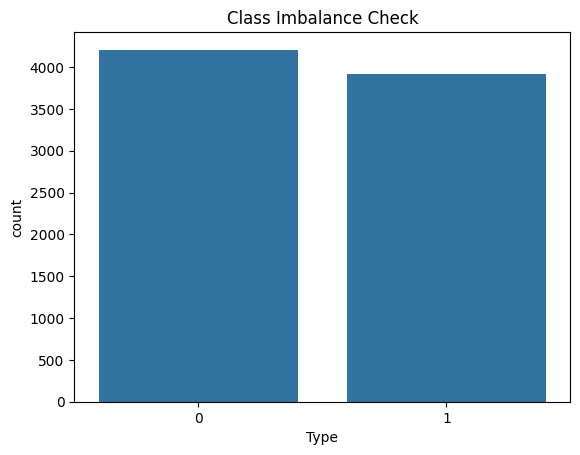

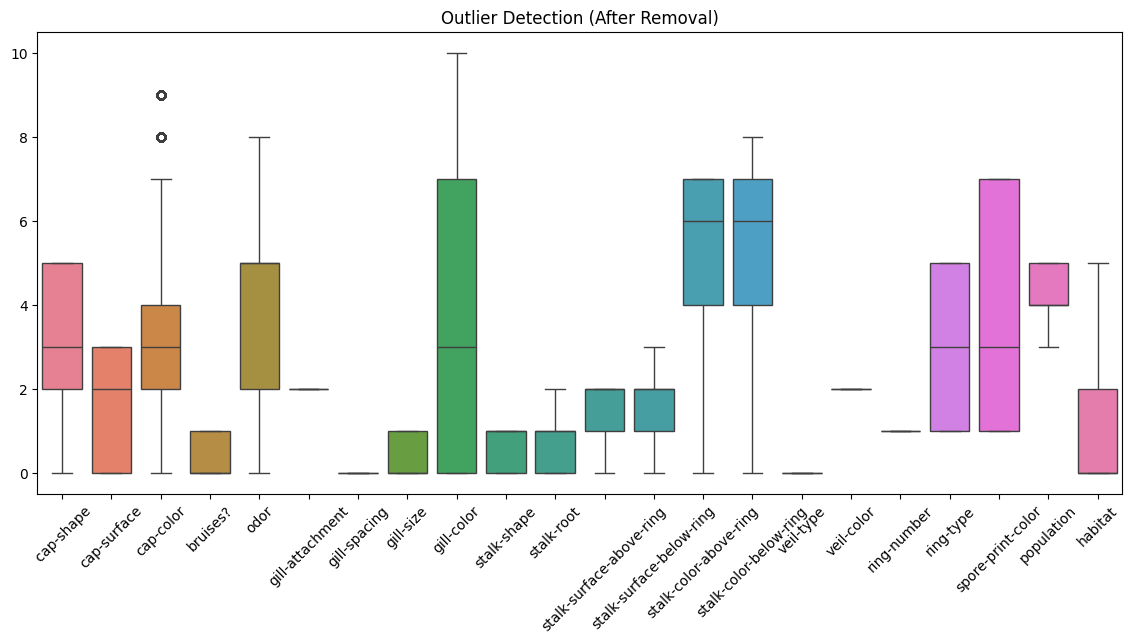

In [71]:
# Step 6: Imbalance and Outlier Checks
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Type', data=df)
plt.title('Class Imbalance Check')
plt.show()

# Remove outliers using IQR method for each feature except 'Type'
features = df.drop('Type', axis=1).columns
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title('Outlier Detection (After Removal)')
plt.xticks(rotation=45)
plt.show()

In [72]:
# Step 7: Feature Engineering
# All features are categorical and encoded. No new features added.

In [73]:
# Step 8: Train/Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (4377, 22)
Test shape: (1095, 22)


In [74]:
# Step 9: Dimensionality Reduction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.32560569 0.20890757 0.09657993 0.05866027 0.05218309]



Decision Tree Results:
Train Accuracy: 0.9803518391592415
Test Accuracy: 0.982648401826484
Test Precision: 0.9758179231863442
Test Recall: 0.997093023255814
Test F1 Score: 0.9863407620416966
Test AUC-ROC: 0.9933057396720187
CV Mean Accuracy: 0.9787545988258317
CV Mean AUC-ROC: 0.9822923965326869
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       407
           1       0.98      1.00      0.99       688

    accuracy                           0.98      1095
   macro avg       0.99      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



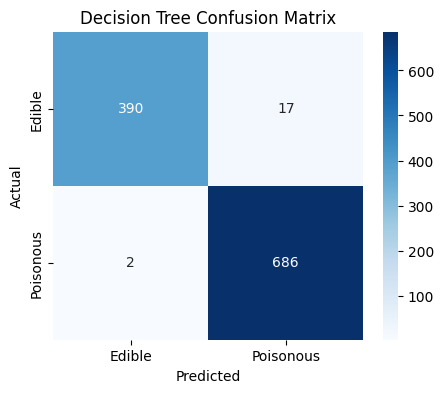

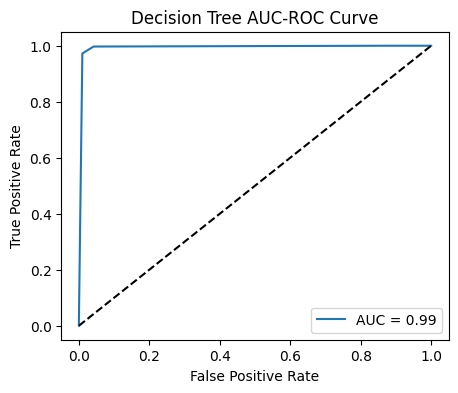


Random Forest Results:
Train Accuracy: 0.9853781128626914
Test Accuracy: 0.9899543378995433
Test Precision: 0.9870503597122302
Test Recall: 0.997093023255814
Test F1 Score: 0.9920462762111352
Test AUC-ROC: 0.9978572652991258
CV Mean Accuracy: 0.9835527723418135
CV Mean AUC-ROC: 0.9915980414503827
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       407
           1       0.99      1.00      0.99       688

    accuracy                           0.99      1095
   macro avg       0.99      0.99      0.99      1095
weighted avg       0.99      0.99      0.99      1095



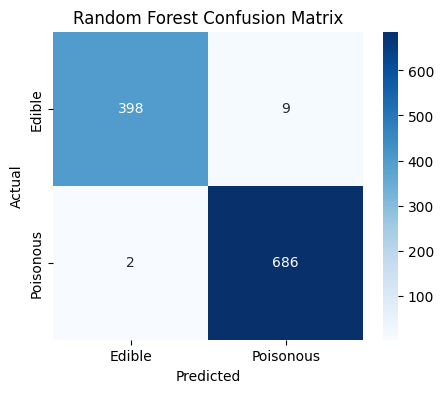

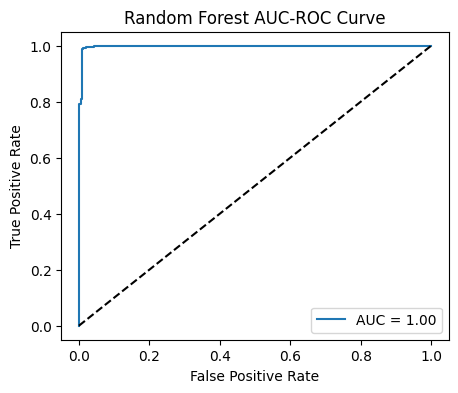


Logistic Regression Results:
Train Accuracy: 0.9755540324423121
Test Accuracy: 0.982648401826484
Test Precision: 0.9926362297496318
Test Recall: 0.9796511627906976
Test F1 Score: 0.986100950987564
Test AUC-ROC: 0.9964966287640706
CV Mean Accuracy: 0.975326549249837
CV Mean AUC-ROC: 0.9903163519601996
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       407
           1       0.99      0.98      0.99       688

    accuracy                           0.98      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



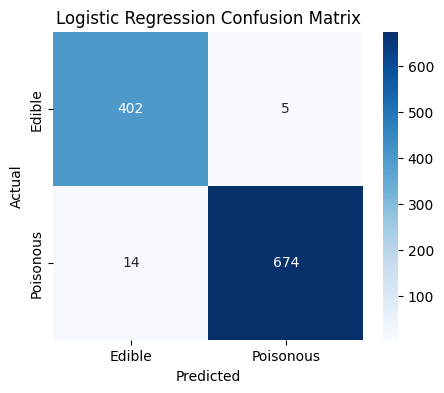

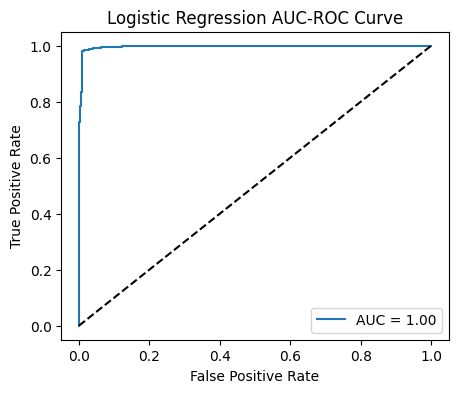


SVM Results:
Train Accuracy: 0.9851496458761709
Test Accuracy: 0.9926940639269406
Test Precision: 0.9941860465116279
Test Recall: 0.9941860465116279
Test F1 Score: 0.9941860465116279
Test AUC-ROC: 0.9997571567339009
CV Mean Accuracy: 0.9849221135029355
CV Mean AUC-ROC: 0.9966908999530416
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.99      0.99      0.99       688

    accuracy                           0.99      1095
   macro avg       0.99      0.99      0.99      1095
weighted avg       0.99      0.99      0.99      1095



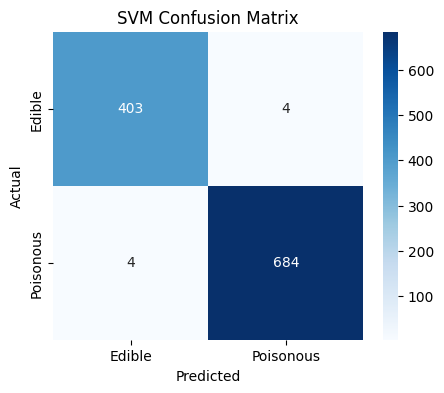

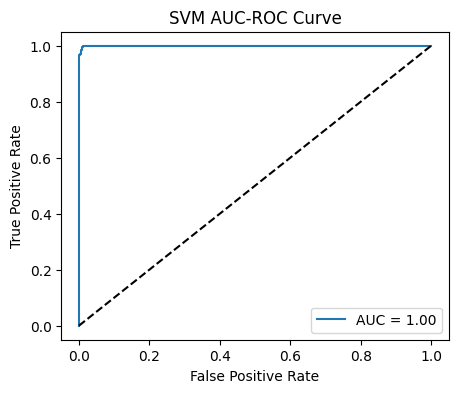

In [75]:
# Step 10: Model Training and Evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use stronger regularization and k-fold cross-validation to reduce overfitting
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.1, random_state=42),
    'SVM': SVC(probability=True, C=0.1, random_state=42)
}
results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    # Cross-validation on training set
    cv_acc = cross_val_score(model, X_train_pca, y_train, cv=skf, scoring='accuracy')
    cv_auc = cross_val_score(model, X_train_pca, y_train, cv=skf, scoring='roc_auc')
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_pca)[:,1]
    else:
        y_proba = model.decision_function(X_test_pca)
    # Save predictions with input features and actual output
    df_pred = pd.DataFrame(X_test, columns=X.columns)
    df_pred['actual'] = y_test.values
    df_pred['predicted'] = y_pred
    df_pred.to_csv(f'{name.replace(' ', '')}_predictions.csv', index=False)
    cm = confusion_matrix(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    results[name] = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': cm,
        'auc_roc': auc_roc,
        'cv_mean_accuracy': cv_acc.mean(),
        'cv_mean_auc': cv_auc.mean()
    }
    print(f'\n{name} Results:')
    print('Train Accuracy:', results[name]['train_accuracy'])
    print('Test Accuracy:', results[name]['test_accuracy'])
    print('Test Precision:', results[name]['precision'])
    print('Test Recall:', results[name]['recall'])
    print('Test F1 Score:', results[name]['f1'])
    print('Test AUC-ROC:', results[name]['auc_roc'])
    print('CV Mean Accuracy:', results[name]['cv_mean_accuracy'])
    print('CV Mean AUC-ROC:', results[name]['cv_mean_auc'])
    print(classification_report(y_test, y_pred))
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # Plot AUC-ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [76]:
# Save necessary objects as pickle files
import pickle

# Save LabelEncoders
with open('le_dict.pkl', 'wb') as f:
    pickle.dump(le_dict, f)

# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save PCA
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Save Random Forest Model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(models['Random Forest'], f)

# Save Valid Categories
with open('valid_categories.pkl', 'wb') as f:
    pickle.dump(valid_categories, f)

# Save Feature Columns
with open('X_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)